In [14]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
# Initialize a Spark session
spark = SparkSession.builder \
    .appName("HR Analytics") \
    .getOrCreate()

# File location and type
file_location = r"C:\Users\HP\Downloads\Big Data Analytics\Data Science Projects\Data Science Internship\Project 3 - HR Analytics-20231111T083906Z-001\Project 3 - HR Analytics\Data P3 MeriSKILL\HR-Employee-Attrition.csv"
file_type = "csv"

# Read the CSV file into a Spark DataFrame
df = spark.read.format(file_type) \
    .option("inferSchema", "true") \
    .option("header", "true") \
    .load(file_location)

# Select the relevant columns
columns = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
           'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
           'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
           'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
           'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
           'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

df = df.select(columns)

# Convert the Spark DataFrame to a Pandas DataFrame
pdf = df.toPandas()

In [16]:
# Encode categorical variables
le = LabelEncoder()
for column in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']:
    pdf[column] = le.fit_transform(pdf[column])

# Split the data into features (X) and target (y)
X = pdf.drop(['Attrition'], axis=1)
y = pdf['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
### KNN Model ###
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Convert classification report to DataFrame for KNN
report_df_knn = pd.DataFrame(report_knn).transpose()

In [22]:
### SVM Model ###
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [23]:
# Convert classification report to DataFrame for SVM
report_df_svm = pd.DataFrame(report_svm).transpose()

# Display the metrics
print("KNN Model Metrics:")
print(report_df_knn)
print("\nConfusion Matrix for KNN:")
print(conf_matrix_knn)

print("\nSVM Model Metrics:")
print(report_df_svm)
print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)

KNN Model Metrics:
              precision    recall  f1-score     support
0              0.868932  0.942105  0.904040  380.000000
1              0.241379  0.114754  0.155556   61.000000
accuracy       0.827664  0.827664  0.827664    0.827664
macro avg      0.555156  0.528430  0.529798  441.000000
weighted avg   0.782128  0.827664  0.800508  441.000000

Confusion Matrix for KNN:
[[358  22]
 [ 54   7]]

SVM Model Metrics:
              precision    recall  f1-score    support
0              0.866359  0.989474  0.923833  380.00000
1              0.428571  0.049180  0.088235   61.00000
accuracy       0.859410  0.859410  0.859410    0.85941
macro avg      0.647465  0.519327  0.506034  441.00000
weighted avg   0.805804  0.859410  0.808251  441.00000

Confusion Matrix for SVM:
[[376   4]
 [ 58   3]]


Text(120.72222222222221, 0.5, 'Actual')

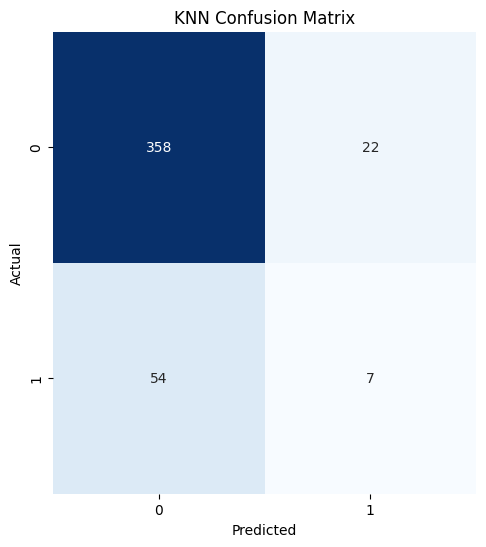

In [24]:
# Visualize Confusion Matrix for KNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

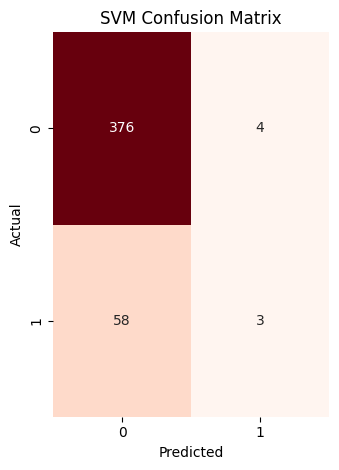

In [21]:
# Visualize Confusion Matrix for SVM
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
